In [2]:
import pandas as pd

In [3]:
import pandas as pd

df_co2 = pd.read_csv('/Users/axel-dupont/Desktop/Project/annual_co2_emissions.csv')
df_green_energy = pd.read_csv('/Users/axel-dupont/Desktop/Project/annual_renewable_energy.csv')
df_population = pd.read_csv('/Users/axel-dupont/Desktop/Project/annual_population.csv', error_bad_lines=False)
df_GDP = pd.read_csv('/Users/axel-dupont/Desktop/Project/GDP.csv')

df_population = df_population.loc[:, ['Country name', 'Year', 'Population']]
df_population = df_population.rename(columns={'Country name': 'Entity'}) #grouper par même pays

/var/folders/5p/f8l310bs2qsdvt7n1myb3vxr0000gn/T/ipykernel_93541/1558906559.py:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_population = pd.read_csv('/Users/axel-dupont/Desktop/Project/annual_population.csv', error_bad_lines=False)
b'Skipping line 9002: expected 22 fields, saw 23\nSkipping line 9003: expected 22 fields, saw 23\nSkipping line 9004: expected 22 fields, saw 23\nSkipping line 9005: expected 22 fields, saw 23\nSkipping line 9006: expected 22 fields, saw 23\nSkipping line 9007: expected 22 fields, saw 23\nSkipping line 9008: expected 22 fields, saw 23\nSkipping line 9009: expected 22 fields, saw 23\nSkipping line 9010: expected 22 fields, saw 23\nSkipping line 9011: expected 22 fields, saw 23\nSkipping line 9012: expected 22 fields, saw 23\nSkipping line 9013: expected 22 fields, saw 23\nSkipping line 9014: expected 22 fields, saw 23\nSkipping line 9015: expected 22 fields, 

In [4]:
df_co2.columns

Index(['Entity', 'Code', 'Year', 'Annual CO₂ emissions'], dtype='object')

In [5]:
df_green_energy.columns

Index(['Entity', 'Code', 'Year', 'Renewables (% equivalent primary energy)'], dtype='object')

In [6]:
df_population.columns

Index(['Entity', 'Year', 'Population'], dtype='object')

In [7]:
df_GDP.columns

Index(['Entity', 'Code', 'Year', 'GDP (constant 2015 US$)'], dtype='object')

In [8]:
print(df_co2.head())

        Entity Code  Year  Annual CO₂ emissions
0  Afghanistan  AFG  1949               14656.0
1  Afghanistan  AFG  1950               84272.0
2  Afghanistan  AFG  1951               91600.0
3  Afghanistan  AFG  1952               91600.0
4  Afghanistan  AFG  1953              106256.0


In [9]:
print(df_green_energy.head())

   Entity Code  Year  Renewables (% equivalent primary energy)
0  Africa  NaN  1965                                  5.747495
1  Africa  NaN  1966                                  6.122062
2  Africa  NaN  1967                                  6.325731
3  Africa  NaN  1968                                  7.005293
4  Africa  NaN  1969                                  7.956088


In [10]:
print(df_population.head())

        Entity  Year  Population
0  Afghanistan  1950     7480464
1  Afghanistan  1951     7571542
2  Afghanistan  1952     7667534
3  Afghanistan  1953     7764549
4  Afghanistan  1954     7864289


In [11]:
print(df_GDP.head())

        Entity Code  Year  GDP (constant 2015 US$)
0  Afghanistan  AFG  2002               7228792320
1  Afghanistan  AFG  2003               7867259392
2  Afghanistan  AFG  2004               7978511360
3  Afghanistan  AFG  2005               8874475520
4  Afghanistan  AFG  2006               9349916672


In [12]:
df_combined = df_co2.merge(df_green_energy, how='left', on=['Entity', 'Code', 'Year']).merge(df_population, how='left', on=['Entity', 'Year']).merge(df_GDP, how='left', on=['Entity', 'Code', 'Year'])

df_combined['GDP per capita'] = df_combined['GDP (constant 2015 US$)'] / df_combined['Population']

def income_dummies(row):
    if row['GDP per capita'] >= 1036 and row['GDP per capita'] < 4045:
        return 1, 0, 0
    elif row['GDP per capita'] >= 4045 and row['GDP per capita'] < 12535:
        return 0, 1, 0
    elif row['GDP per capita'] >= 12535:
        return 0, 0, 1
    else:
        return 0, 0, 0

df_combined[['Lower-middle income', 'Upper-middle income', 'High income']] = df_combined.apply(income_dummies, axis=1, result_type='expand')

df_combined = df_combined.rename(columns={'Entity': 'Country', 'Annual CO₂ emissions': 'CO2 emissions', 'Renewables (% equivalent primary energy)': 'Renewable energy %', 'GDP (constant 2015 US$)': 'GDP'})
df_combined = df_combined[df_combined['Code'].notna()]
df_combined = df_combined.drop('Code', axis='columns')

df_2020 = df_combined.loc[df_combined.Year == 2020]
df_2020
#In summary, this code merges four DataFrames, calculates GDP per capita, creates dummy variables for income categories, and cleans up the resulting DataFrame. It then selects only the rows with data from the year 2020 and prints them to the console.



,Country,Year,CO2 emissions,Renewable energy %,Population,GDP,GDP per capita,Lower-middle income,Upper-middle income,High income
71,Afghanistan,2020,1.168177e+07,NaN,3.897224e+07,2.062195e+10,529.144565,0,0,0
604,Albania,2020,4.728559e+06,NaN,2.866850e+06,1.245786e+10,4345.487955,0,1,0
710,Algeria,2020,1.725045e+08,0.297899,4.345167e+07,1.681441e+11,3869.682111,1,0,0
982,Andorra,2020,4.488840e+05,NaN,7.772300e+04,2.649304e+09,34086.484155,0,0,1
1054,Angola,2020,2.027573e+07,NaN,3.342849e+07,1.041287e+11,3114.968221,1,0,0
...,...,...,...,...,...,...,...,...,...,...
30812,Wallis and Futuna,2020,2.706900e+04,NaN,1.167900e+04,NaN,NaN,0,0,0
31084,World,2020,3.526409e+10,13.455194,7.840953e+09,8.183009e+13,10436.243005,0,1,0
31156,Yemen,2020,1.214013e+07,NaN,3.228404e+07,NaN,NaN,0,0,0
31228,Zambia,2020,7.280663e+06,NaN,1.892772e+07,2.341895e+10,1237.283227,1,0,0


In [13]:
df = pd.read_csv('/Users/axel-dupont/Desktop/Project/annual_co2_emissions.csv')

# Group the data by country and sum the emissions for each country
total_co2_by_country = df.groupby('Entity')['Annual CO₂ emissions'].sum()

# Sort the data in descending order and display the top 5 countries
top_5_countries = total_co2_by_country.sort_values(ascending=False).head(5)
print(top_5_countries)


Entity
World                    1.736930e+12
High-income countries    9.796852e+11
OECD (GCP)               9.563439e+11
Non-OECD (GCP)           7.329609e+11
Asia                     5.575965e+11
Name: Annual CO₂ emissions, dtype: float64


In [14]:
exclude_entities = ['World', 'High-income countries', 'OECD (GCP)', 'Non-OECD (GCP)', 'Upper-middle-income countries' ]
top_5_countries = total_co2_by_country[~total_co2_by_country.index.isin(exclude_entities)].sort_values(ascending=False).head(5)
print(top_5_countries)

Entity
Asia             5.575965e+11
Europe           5.372442e+11
Europe (GCP)     5.328522e+11
Asia (GCP)       4.857938e+11
North America    4.842147e+11
Name: Annual CO₂ emissions, dtype: float64


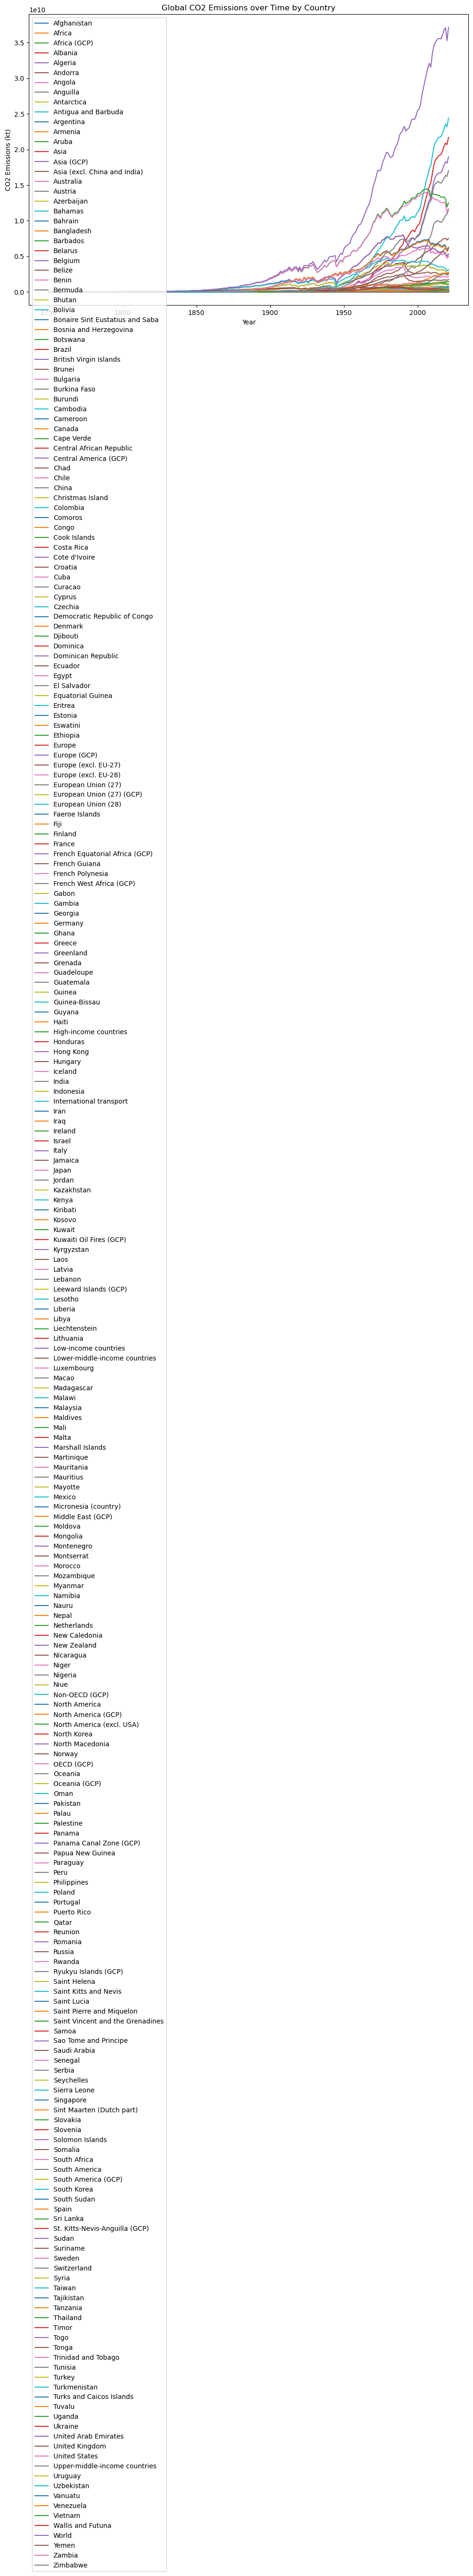

In [15]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('/Users/axel-dupont/Desktop/Project/annual_co2_emissions.csv')


df_grouped = df.groupby(['Entity', 'Year'])['Annual CO₂ emissions'].sum()


fig, ax = plt.subplots(figsize=(12,8))
for country in df_grouped.index.levels[0]:
    ax.plot(df_grouped.loc[country].index, df_grouped.loc[country].values, label=country)
ax.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kt)')
plt.title('Global CO2 Emissions over Time by Country')
plt.show()

In [17]:
df_grouped = df.groupby('Entity')['Annual CO₂ emissions'].sum()
total_world_emissions = df_grouped.sum()


df_percentages = (df_grouped / total_world_emissions) * 100
print(df_percentages)

Entity
Afghanistan           0.001830
Africa                0.412464
Africa (GCP)          0.412565
Albania               0.002467
Algeria               0.040820
                       ...    
Wallis and Futuna     0.000006
World                14.581045
Yemen                 0.005470
Zambia                0.002163
Zimbabwe              0.006701
Name: Annual CO₂ emissions, Length: 258, dtype: float64
